## **Linear regression plots**

In this notebook, we will use the data from the World Happiness Report 2020.

### **Learning outcome:**
- Distinguish between a scatter plot and a regression plot
- Plotting regression lines and confidence intervals. What is regression?
- Plotting pairwise relationships

<table border=0><tr><td><img src="https://frontiermarketnews.files.wordpress.com/2017/03/coverhappy.jpg" width=550></td></tr></table>

Here is the descriptions of the data:
1. `Country`: The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.
2. `Year`: This dataset contains survey data of the state of global happiness from 2005 to 2018.
3. `Life ladder`: Also know as, Cantril ladder. Respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.
4. `GDP per capita` is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita.
5. The time series of `healthy life expectancy at birth` are constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. To match this report’s sample period, interpolation and extrapolation are used.
6. `Social support` is the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
7. `Freedom to make life choices` is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
8. `Generosity` is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita.
9. `Perceptions of corruption` are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.
10. `Positive affect` is defined as the average of previous-day affect measures for happiness, laughter, and enjoyment for GWP waves 3-7 (years 2008 to 2012, and some in 2013). It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked. The general form for the affect questions is: Did you experience the following feelings during a lot of the day yesterday? See pp. 1-2 of Statistical Appendix 1 for more details.
11. `Negative affect` is defined as the average of previous-day affect measures for worry, sadness, and anger for all waves.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
happiness_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/world_happiness_report_2020.csv"
happy = pd.read_csv(happiness_url)

In [ ]:
happy.head()

,Country,Year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919


In [2]:
# Rename headers for some columns
happy = happy.rename(columns={"Life_Ladder":"Happiness",
                      "Log_GDP_per_capita":"Wealth",
                      "Social_support":"Social support",
                      "Healthy_life_expectancy_at_birth":"Life expectancy",
                      "Freedom_to_make_life_choices":"Freedom",
                      "Perceptions_of_corruption":"Corruption perceptions",
                      "Positive_affect":"Positive affect",
                      "Negative_affect":"Negative affect"})

In [3]:
# Check the size of our dataset and detail of dataframe
happy.shape
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1704 non-null   object 
 1   Year                    1704 non-null   int64  
 2   Happiness               1704 non-null   float64
 3   Wealth                  1676 non-null   float64
 4   Social support          1691 non-null   float64
 5   Life expectancy         1676 non-null   float64
 6   Freedom                 1675 non-null   float64
 7   Generosity              1622 non-null   float64
 8   Corruption perceptions  1608 non-null   float64
 9   Positive affect         1685 non-null   float64
 10  Negative affect         1691 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 146.6+ KB


In [ ]:
### This line will return the total number of missing entries in the "Corruption perceptions" column of the happy DataFrame
sum(happy["Corruption perceptions"].isnull())

96

In [ ]:
### Return a new DataFrame containing only the rows where the "Corruption perceptions" column is NaN.
happy[happy["Corruption perceptions"].isnull()]

,Country,Year,Happiness,Wealth,Social support,Life expectancy,Freedom,Generosity,Corruption perceptions,Positive affect,Negative affect
25,Algeria,2014,6.354898,9.509210,0.818189,65.139999,NaN,NaN,NaN,0.625905,0.176866
26,Algeria,2016,5.340854,9.541166,0.748588,65.500000,NaN,NaN,NaN,0.660510,0.377112
100,Bahrain,2014,6.165134,10.688241,NaN,67.419998,NaN,NaN,NaN,NaN,NaN
101,Bahrain,2015,6.007375,10.690272,0.852551,67.699997,0.849521,0.103796,NaN,0.715543,0.302972
102,Bahrain,2016,6.169673,10.683798,0.862700,68.099998,0.888691,0.080129,NaN,0.787187,0.283466
...,...,...,...,...,...,...,...,...,...,...,...
1664,Vietnam,2015,5.076315,8.622428,0.848677,67.300003,NaN,0.087423,NaN,0.642237,0.232416
1666,Vietnam,2017,5.175279,8.727759,NaN,67.699997,NaN,NaN,NaN,NaN,NaN
1668,Yemen,2007,4.477133,8.340983,0.824969,53.400002,0.672685,-0.005798,NaN,0.591898,0.378784
1676,Yemen,2016,3.825631,7.299221,0.775407,55.099998,0.532964,-0.125668,NaN,0.469345,0.227925


In [ ]:
### Check if there are missing data in each column
happy.isnull().sum()

,0
Country,0
Year,0
Happiness,0
Wealth,28
Social support,13
Life expectancy,28
Freedom,29
Generosity,82
Corruption perceptions,96
Positive affect,19


In [ ]:
### Check the data type of each column
# happy.dtypes

## Plotting regression lines and confidence intervals

Let's look at the relationship between `Happiness` and `Freedom`.


Although seaborn is not a statistics package, it does carry out a few statistical methods for the purposes of visualizion. The various regression functions don’t deal well with missing data or integers, so to avoid errors we’ll first make a copy of our data with all integer columns converted to floating point, and all missing data removed:

In [ ]:
### Removes any rows from the happy DataFrame that contain at least one NaN (missing) value. By default, it drops rows with any missing values in any column.
happy = happy.dropna()

### Returns a tuple representing the dimensions of the DataFrame; (# of row, # of columns) after dropping rows wih NaN
happy.shape

(1512, 11)

### Linear regression

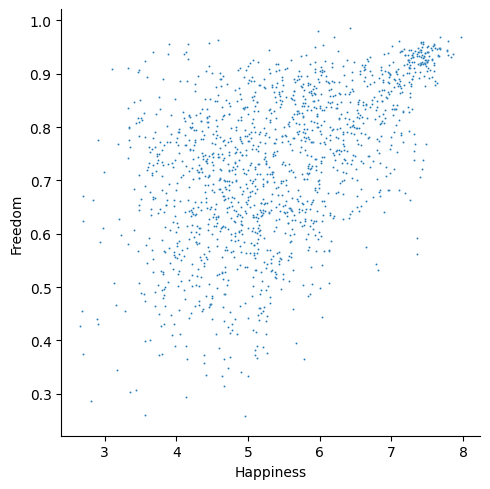

In [ ]:
### Visualizing the relationship between two numeric variables
### Limitation of relplot() is that it does not include any statistical fits or lines
sns.relplot(data=happy, x="Happiness", y="Freedom", s=2)

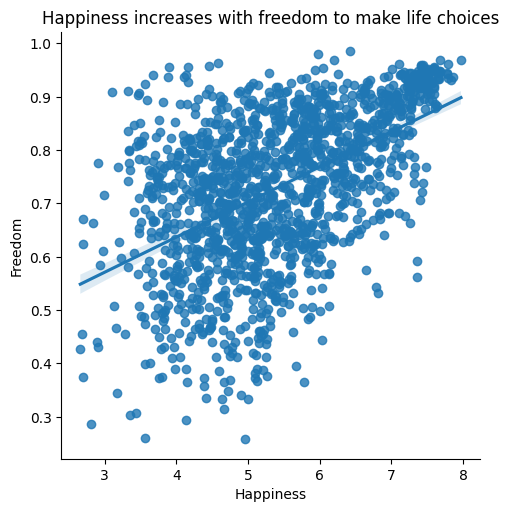

In [ ]:
''' Linear regression plot
sns.lmplot() is designed to plot linear regression models '''

### Creates scatterplot, but also fits and displays a regression line (linear fit) through the data points.
sns.lmplot(data=happy,
           x="Happiness",
           y="Freedom")
plt.title("Happiness increases with freedom to make life choices");

It's hard to see when the data points are big. Let's reduce the size of the data points by setting the `scatter_kws` argument ([lmplot documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html)).   

With this we get a regression line with shaded 95% confidence intervals. There are a few options that are commonly
useful: setting ci=None turns off the confidence intervals (and speeds up plotting large datasets) and setting the
order argument (order=2 for a quadratic polynomial) fits a polynomial regression.  

A polynomial regression (y=b_0+b_1x+b_2x^2+b_3x^3+b_nx^n)
plot models the relationship between a dependent variable and one or more independent variables as an nth-degree polynomial. Polynomial regression can fit curves, allowing for more complex relationships.


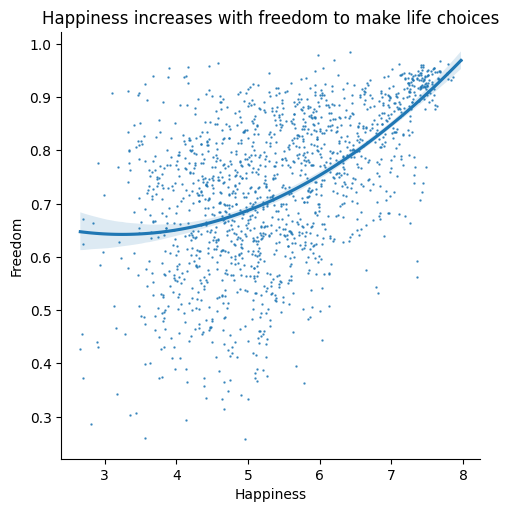

In [ ]:
# # Regression plot
sns.lmplot(
    data=happy,
    x="Happiness",
    y="Freedom",
    ci=90, # int
    # ci=None, # no confidence interval
    order=2, # quadratic polynomial
    markers='.',
    scatter_kws={'s':2}
)
plt.title(
"Happiness increases with freedom to make life choices"
);

### SciPy

An obvious question is how to get the actual results for the regression. There’s no way to obtain these from the plot, but it’s not hard to do using a python scientific package `scipy` . We have to make sure to use our floating point version of the data.  

stats.linregress() is used for for statistical insights. linregress() performs a linear regression analysis and returns statistics about the fit, such as slope, intercept, R-squared value, p-value, and standard error.

In [ ]:
from scipy import stats
linear_regression = stats.linregress(happy.Happiness,happy.Freedom)
print(linear_regression.slope) # can access attributes
linear_regression

0.06591423216850241


LinregressResult(slope=np.float64(0.06591423216850241), intercept=np.float64(0.3730970367531049), rvalue=np.float64(0.5147722602066239), pvalue=np.float64(4.478777477180372e-103), stderr=np.float64(0.002825023533725479), intercept_stderr=np.float64(0.015616528566836303))

From the object that’s returned by the stats.linregress function we can get the slope, intercept and p-value. Here is a good [post](https://thestatsninja.com/2018/11/07/the-analytics-pain-part-3-interpreting-p-values-with-linear-regression/) regarding how to interpret p-values with linear regression.

## Plotting pairwise relationships

Here we want to examine all the pairwise relationships. This typically happens when starting to look at a new dataset, either to identify variables that might be worth examining in more detail, or as a quick sanity check to look for obvious correlations that shouldn’t be there.

The `pairplot` function will take a dataframe and draw scatter plots for all pairs of numerical variables. This
typically creates a large figure, so we often want to make the individual charts smaller, and the point size smaller. Since we are only looking for factors that contribute to happiness, we will drop the Year and Country columns.

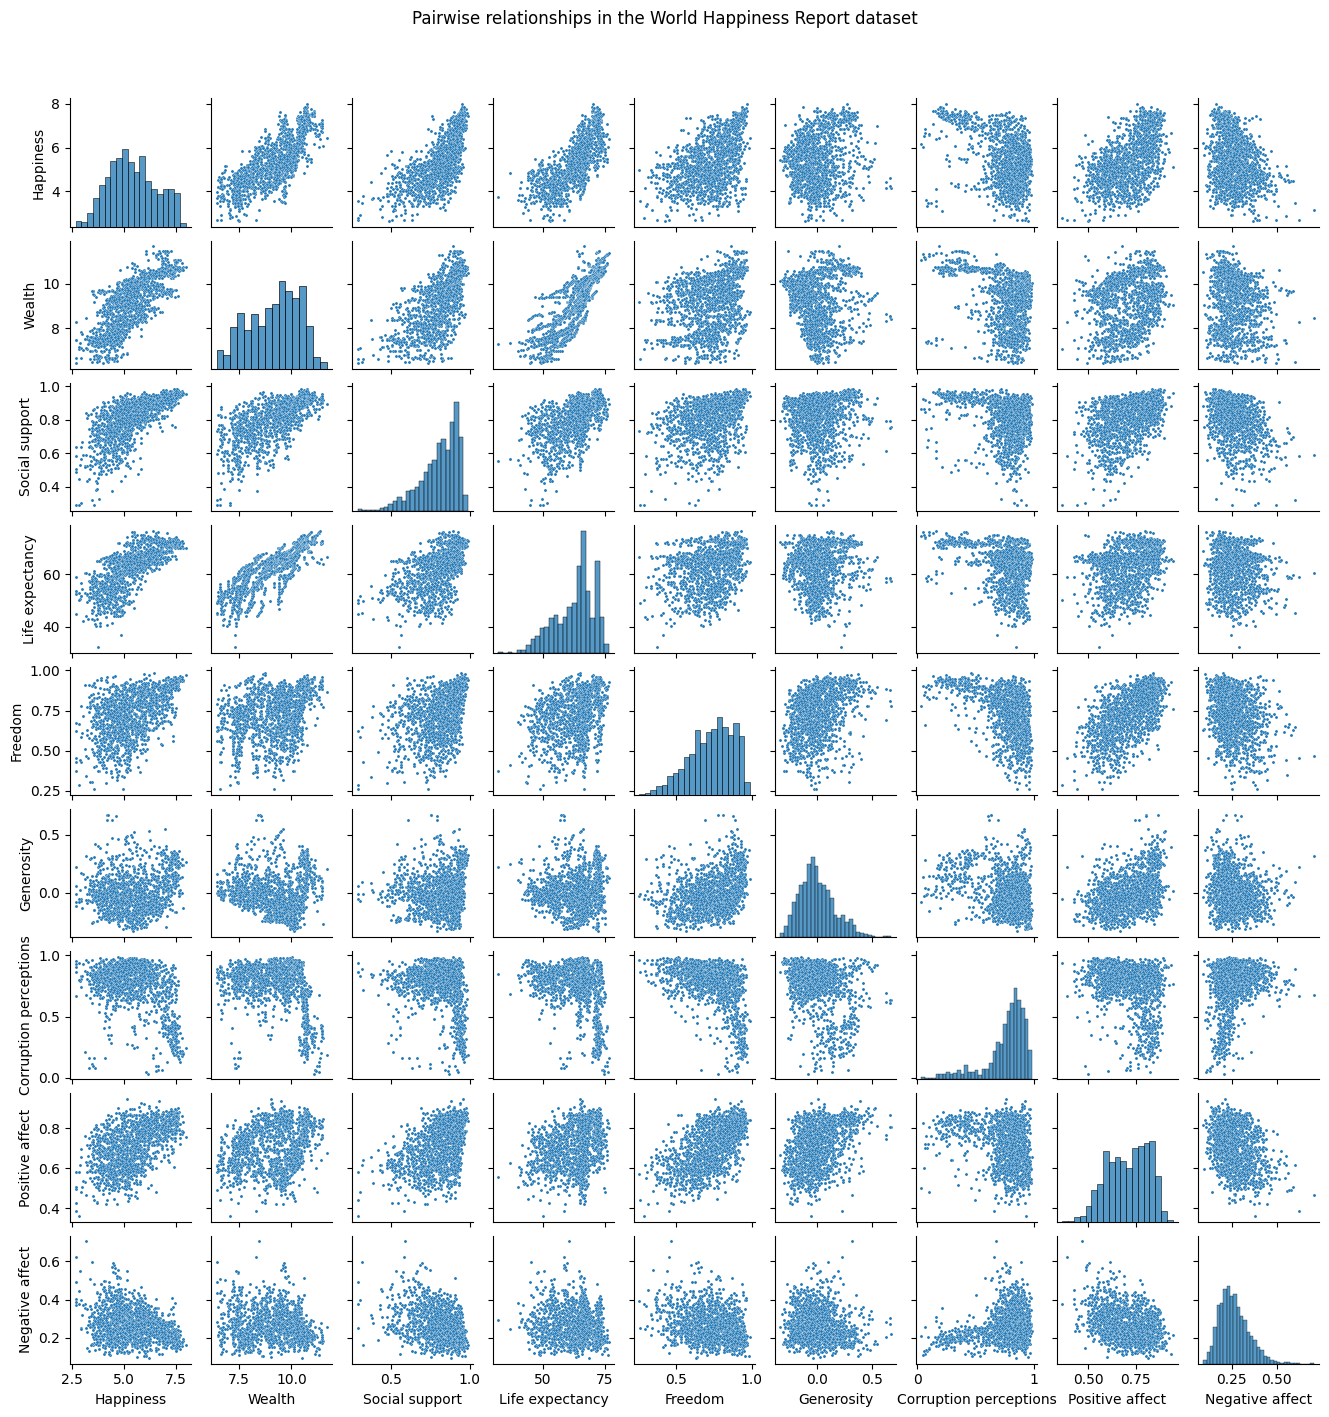

In [ ]:
# Pair plot
g=sns.pairplot(
    data=happy.drop(['Country','Year'], axis=1),
    plot_kws={"s":5}, # draw small points
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the World Happiness Report dataset", y=1.05
);

# While running - cautions with pair plots

Given the small size of the plots, it’s often helpful to draw a regression line to make the patterns clearer. With large numbers of points, it’s nice to have the regression line drawn in a different color, to make it easier to see against the background of the points. A neutral, light color gives a good effect, deemphasizing the points to make the regression line stand out. Just like with our individual regression plots, we have to use the floating point version of the data.

Plot shows:  
Scatter Plots: to visualize how relationship between two variables  
Regression Lines: insight into the trend and strength of the relationships; positive or negative correlation  
Diagonal: show the data distribution of each individual variable

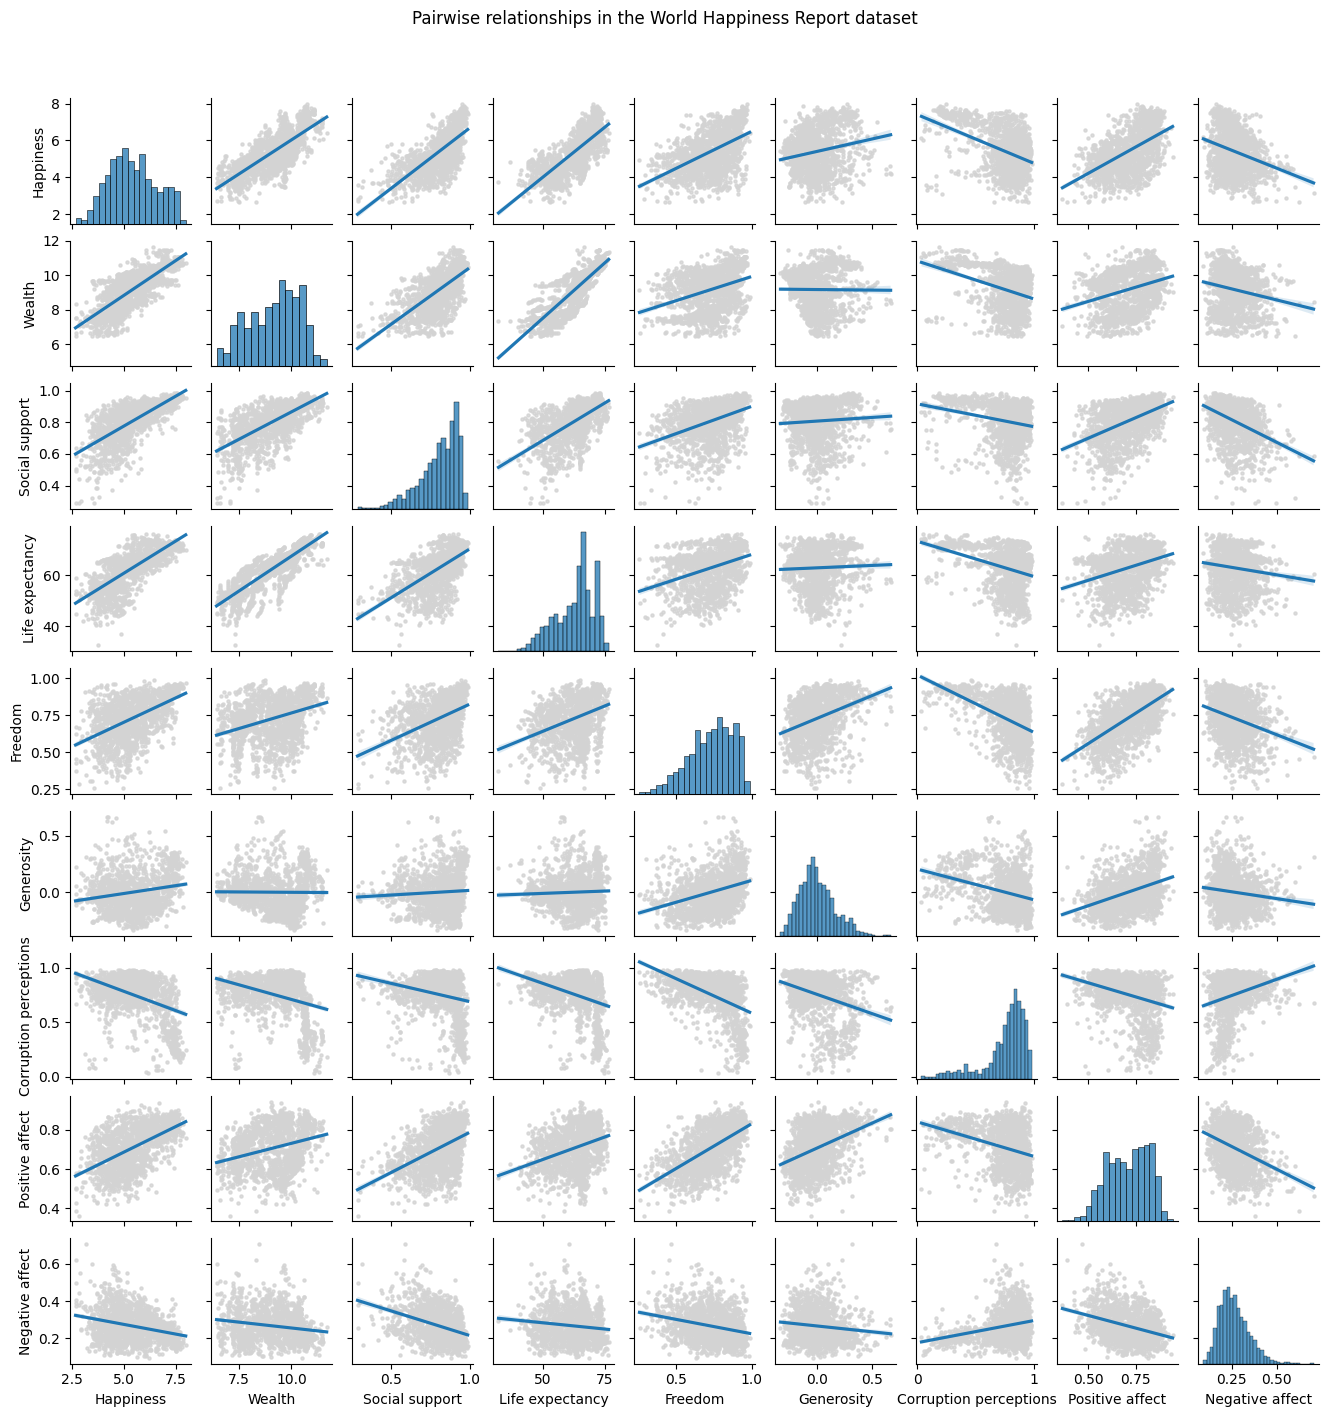

In [ ]:
# Styled pair plot
g=sns.pairplot(
    data=happy.drop(['Country','Year'], axis=1),
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}},
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the World Happiness Report dataset", y=1.05
);

We also have a nice example here of a pattern that simple linear regression fails to identify: Wealth vs Generosity. This illustrates the value of having the points and the regression plotted together - glancing just at the slope of the regression line we might conclude that nothing interesting.

## **Class Exercise CL9.1**
Compare a linear versus a polynomial models using the order=2 to explore overfitting for the relationship between `Wealth` and `Generosity`. After plotting answer the following:

- Does the polynomial line better capture curvature?
- How does adding polynomial order risk overfitting, especially if the data is noisy or sparse in some regions?

&nbsp;  
**Here is your answer for CL5.1** (Create a code box below with your code)    

## Polynomial regression line
In the CL9.1, you explored if switching to a polynomial regression line with order=2 does a better job of capturing the pattern in Wealth vs Generosity. Let's apply the polynomial regression acorss all the data to see there are changes to the pattern captured

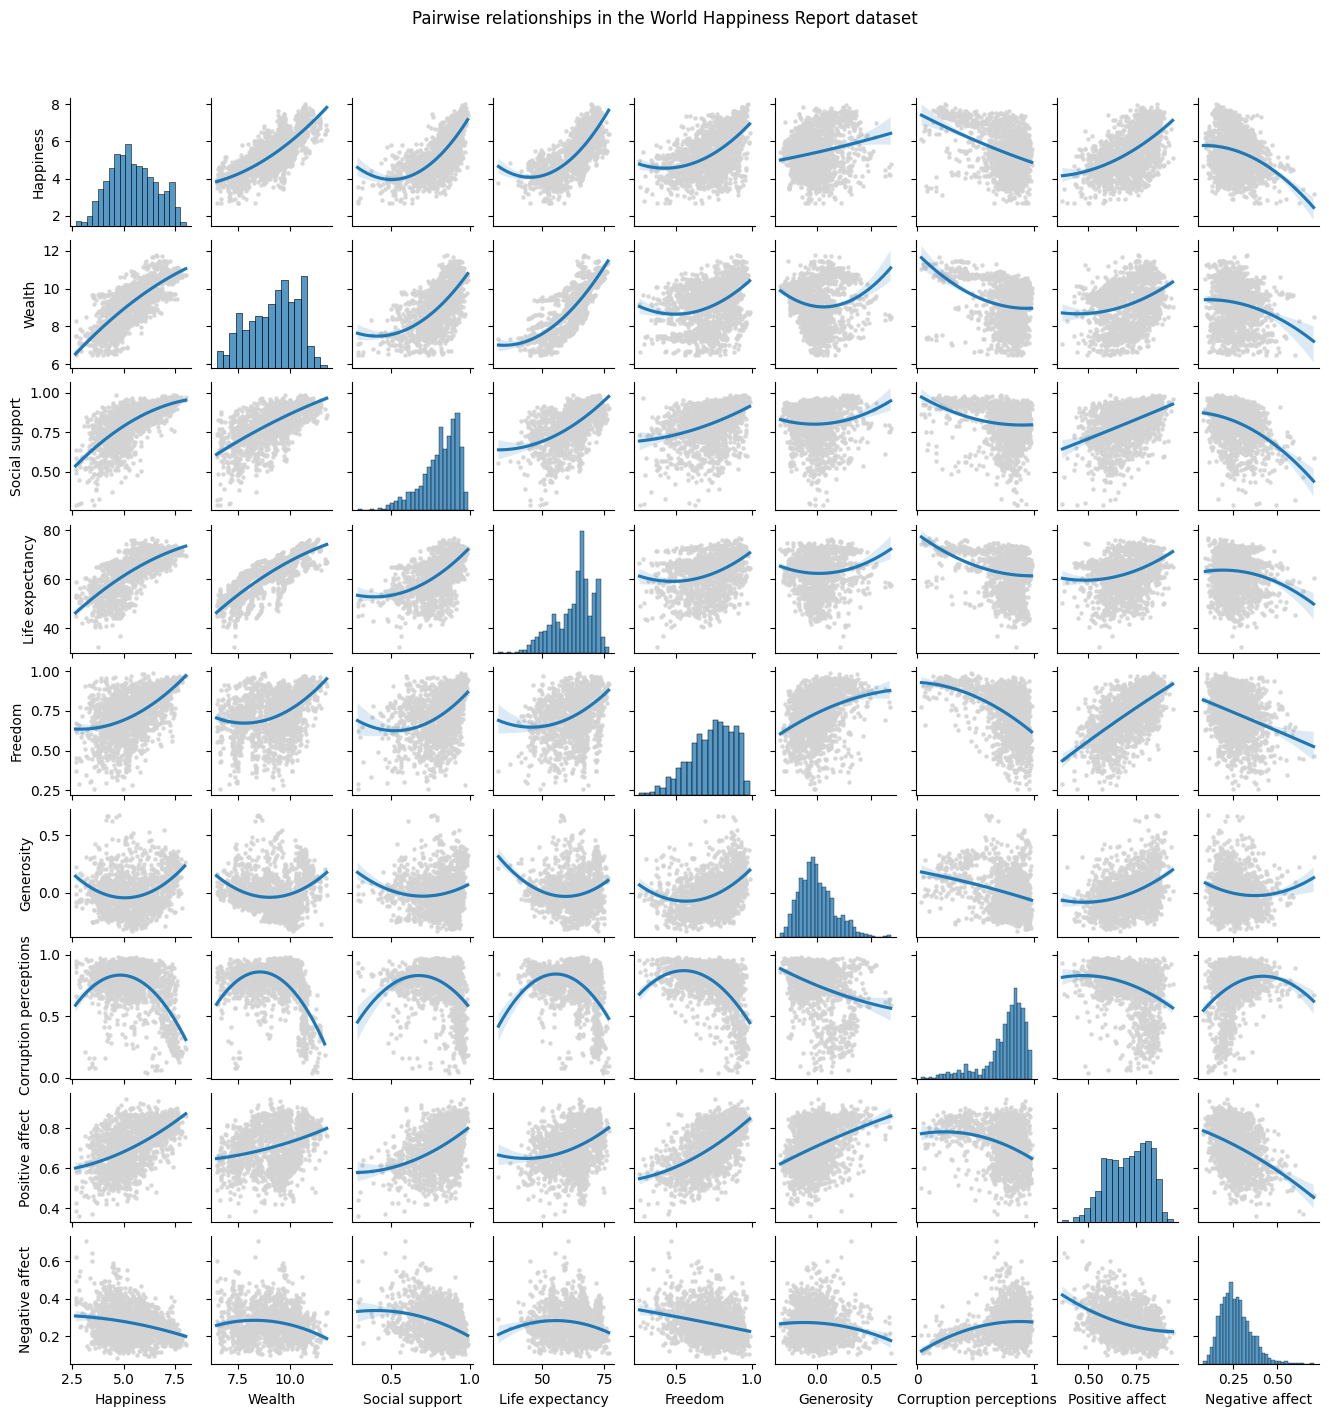

In [4]:
# Polynomial pair plot
g=sns.pairplot(
    data=happy.drop(['Country','Year'], axis=1),
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5 # make the individual plots small
);

g.fig.suptitle(
    "Pairwise relationships in the World Happiness Report dataset", y=1.05
);

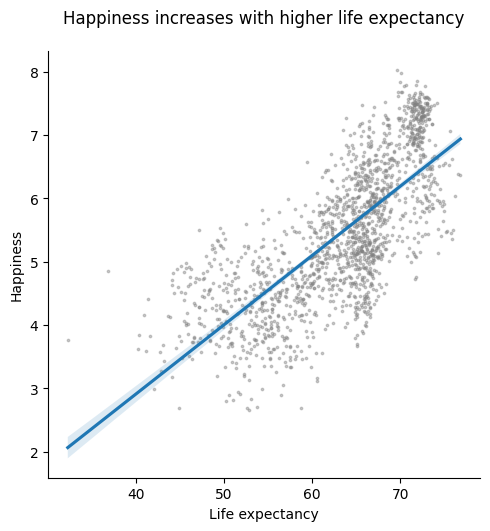

In [5]:
### Pull out a few values to plot

example_plot = sns.lmplot(data=happy,
                          x="Life expectancy",
                          y="Happiness",
                          scatter_kws={"color":"grey", "alpha": 0.4, 's':3}, # 's':6, "alpha": 0.3
                          )
plt.title("Happiness increases with higher life expectancy", pad=20);